## Library

In [2]:
#Load library
import pandas as pd
import numpy as np
import math
import warnings
warnings.filterwarnings("ignore")
import sys
sys.path.insert(0, '../script/')
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

## Data Prepocessing

In [5]:
#data all
df_all = pd.read_csv('../Downloads/dataset HR/dataset HR analytics.csv')

df_all.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,RoleID,LevelID,PerfScoreID,Tribe,Squad,DOB,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,RecruitmentSource,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,A Ridwan,10001,Not married,Single,M,TKP/ Outsource,Product Owner,Senior,Exceed,EWD,Evaluate,07/10/1983,Sunda,07/05/2011,NaN,N/A-StillEmployed,Active,LinkedIn,4.60,5,0,1/17/2020,0,1
1,Ade Setyanto,10002,Not married,Single,M,TKP/ Outsource,Product Owner,Senior,Fully meets,EWD,Pay,05/05/1975,Sunda,3/30/2015,6/16/2018,career change,Voluntarily Terminated,Indeed,4.96,3,6,2/24/2017,0,17
2,Adhitya Bramantya Ranggatyasta,10003,Married,Divorced,F,TKP/ Outsource,Product Owner,Senior,Average,ENT,HunianAja,09/19/88,Jawa,07/05/2011,9/24/2014,hours,Voluntarily Terminated,LinkedIn,3.02,3,0,5/15/2013,0,3
3,Adji Wijaya Kusuma,10004,Not married,Single,F,TKP/ Outsource,Business Analyst,Middle,Exceed,ENT,Intermoda,09/27/88,Cina,01/07/2008,NaN,N/A-StillEmployed,Active,Indeed,4.84,5,0,01/03/2020,0,15
4,Agus Andri Putra,10005,Not married,Single,F,Prohire,Business Analyst,Middle,Average,EDU,Squad Pijar Sekolah,09/08/1989,Bali,07/11/2011,09/06/2018,return to school,Voluntarily Terminated,Google Search,5.00,4,0,02/01/2017,0,2


In [7]:
df_all['resign'] = np.where(df_all.EmploymentStatus=="Active", 0, 1)

In [8]:
df_all['resign'].value_counts(normalize=True)

0    0.675958
1    0.324042
Name: resign, dtype: float64

In [9]:
df_all.dtypes

Employee_Name                  object
EmpID                           int64
MarriedID                      object
MaritalStatusID                object
GenderID                       object
EmpStatusID                    object
RoleID                         object
LevelID                        object
PerfScoreID                    object
Tribe                          object
Squad                          object
DOB                            object
RaceDesc                       object
DateofHire                     object
DateofTermination              object
TermReason                     object
EmploymentStatus               object
RecruitmentSource              object
EngagementSurvey              float64
EmpSatisfaction                 int64
SpecialProjectsCount            int64
LastPerformanceReview_Date     object
DaysLateLast30                  int64
Absences                        int64
resign                          int64
dtype: object

In [10]:
df_all.isnull().sum()

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
RoleID                          0
LevelID                         0
PerfScoreID                     0
Tribe                           0
Squad                           0
DOB                             0
RaceDesc                        0
DateofHire                      0
DateofTermination             194
TermReason                      0
EmploymentStatus                0
RecruitmentSource               0
EngagementSurvey                0
EmpSatisfaction                 0
SpecialProjectsCount            0
LastPerformanceReview_Date      0
DaysLateLast30                  0
Absences                        0
resign                          0
dtype: int64

In [5]:
# statistics(df_train, col_per_table=5)

In [11]:
#FUNCTION FOR SELECTING CATEGORICAL AND NUMERICAL VARIABLE
def categorical(df):
    num=list(df.columns[df.dtypes=='object'])
    return num
    
def numerical(df):
    cat=list(df.columns[df.dtypes=='int64'])+list(df.columns[df.dtypes=='int32'])+list(df.columns[df.dtypes=='float64'])
    return cat

In [12]:
num = numerical(df_all)
num = [x for x in num if x not in ['Best Performance']]
print('numerical features :',num,'\n')
print('lenght of numerical variable :',len(num))

cat = categorical(df_all)
print('categorical features :',cat,'\n')
print('lenght of categorical variable :',len(cat))

numerical features : ['EmpID', 'EmpSatisfaction', 'SpecialProjectsCount', 'DaysLateLast30', 'Absences', 'resign', 'EngagementSurvey'] 

lenght of numerical variable : 7
categorical features : ['Employee_Name', 'MarriedID', 'MaritalStatusID', 'GenderID', 'EmpStatusID', 'RoleID', 'LevelID', 'PerfScoreID', 'Tribe', 'Squad', 'DOB', 'RaceDesc', 'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus', 'RecruitmentSource', 'LastPerformanceReview_Date'] 

lenght of categorical variable : 18


In [13]:
df = df_all.drop_duplicates()
df.shape

(287, 25)

### Feature Engineering

#### Numeric

In [14]:
df[num].head()

,EmpID,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,resign,EngagementSurvey
0,10001,5,0,0,1,0,4.60
1,10002,3,6,0,17,1,4.96
2,10003,3,0,0,3,1,3.02
3,10004,5,0,0,15,0,4.84
4,10005,4,0,0,2,1,5.00


In [27]:
num_list=['EmpSatisfaction','SpecialProjectsCount','DaysLateLast30','Absences','EngagementSurvey','resign']

In [28]:
df_num=df[num_list]

In [29]:
df_num.head()

,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,EngagementSurvey,resign
0,5,0,0,1,4.60,0
1,3,6,0,17,4.96,1
2,3,0,0,3,3.02,1
3,5,0,0,15,4.84,0
4,4,0,0,2,5.00,1


#### Categoric

In [17]:
df[cat].head()

,Employee_Name,MarriedID,MaritalStatusID,GenderID,EmpStatusID,RoleID,LevelID,PerfScoreID,Tribe,Squad,DOB,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,RecruitmentSource,LastPerformanceReview_Date
0,A Ridwan,Not married,Single,M,TKP/ Outsource,Product Owner,Senior,Exceed,EWD,Evaluate,07/10/1983,Sunda,07/05/2011,NaN,N/A-StillEmployed,Active,LinkedIn,1/17/2020
1,Ade Setyanto,Not married,Single,M,TKP/ Outsource,Product Owner,Senior,Fully meets,EWD,Pay,05/05/1975,Sunda,3/30/2015,6/16/2018,career change,Voluntarily Terminated,Indeed,2/24/2017
2,Adhitya Bramantya Ranggatyasta,Married,Divorced,F,TKP/ Outsource,Product Owner,Senior,Average,ENT,HunianAja,09/19/88,Jawa,07/05/2011,9/24/2014,hours,Voluntarily Terminated,LinkedIn,5/15/2013
3,Adji Wijaya Kusuma,Not married,Single,F,TKP/ Outsource,Business Analyst,Middle,Exceed,ENT,Intermoda,09/27/88,Cina,01/07/2008,NaN,N/A-StillEmployed,Active,Indeed,01/03/2020
4,Agus Andri Putra,Not married,Single,F,Prohire,Business Analyst,Middle,Average,EDU,Squad Pijar Sekolah,09/08/1989,Bali,07/11/2011,09/06/2018,return to school,Voluntarily Terminated,Google Search,02/01/2017


In [31]:
cat_list=['MarriedID','GenderID','RoleID','LevelID','PerfScoreID','RaceDesc','RecruitmentSource']

In [32]:
df_cat=df[cat_list]

In [33]:
df_cat.head()

,MarriedID,GenderID,RoleID,LevelID,PerfScoreID,RaceDesc,RecruitmentSource
0,Not married,M,Product Owner,Senior,Exceed,Sunda,LinkedIn
1,Not married,M,Product Owner,Senior,Fully meets,Sunda,Indeed
2,Married,F,Product Owner,Senior,Average,Jawa,LinkedIn
3,Not married,F,Business Analyst,Middle,Exceed,Cina,Indeed
4,Not married,F,Business Analyst,Middle,Average,Bali,Google Search


In [37]:
df_dummies=pd.get_dummies(df_cat,drop_first=True)

In [39]:
df_data=pd.concat([df_dummies,df_num], axis=1)

In [40]:
df_data.head()

,MarriedID_Not married,GenderID_M,RoleID_Back End Developer,RoleID_Business Analyst,RoleID_DevOps Engineer,RoleID_Digital Product Manager,RoleID_Front End Developer,RoleID_Mobile Developer Android,RoleID_Mobile Developer iOS,RoleID_Product Owner,RoleID_Scrum Master,RoleID_Software Architect,RoleID_System Documentation,RoleID_UI Designer,RoleID_UX Designer,RoleID_UX Researcher,RoleID_UX Writer,LevelID_Middle,LevelID_Senior,PerfScoreID_Exceed,PerfScoreID_Fully meets,PerfScoreID_Need improvement,PerfScoreID_Special treatment,RaceDesc_Cina,RaceDesc_Jawa,RaceDesc_Padang,RaceDesc_Sunda,RecruitmentSource_Diversity Job Fair,RecruitmentSource_Employee Referral,RecruitmentSource_Google Search,RecruitmentSource_Indeed,RecruitmentSource_LinkedIn,RecruitmentSource_On-line Web application,RecruitmentSource_Other,RecruitmentSource_Website,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,EngagementSurvey,resign
0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,5,0,0,1,4.60,0
1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,3,6,0,17,4.96,1
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,3,0,0,3,3.02,1
3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,5,0,0,15,4.84,0
4,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,4,0,0,2,5.00,1


In [41]:
label='resign'

In [42]:
y = df_data[label]
df_data.drop(label,axis=1,inplace=True)

In [51]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_data,y,test_size = .4,random_state=10)

In [70]:
df_data.dtypes

MarriedID_Not married                          uint8
GenderID_M                                     uint8
RoleID_Back End Developer                      uint8
RoleID_Business Analyst                        uint8
RoleID_DevOps Engineer                         uint8
RoleID_Digital Product Manager                 uint8
RoleID_Front End Developer                     uint8
RoleID_Mobile Developer Android                uint8
RoleID_Mobile Developer iOS                    uint8
RoleID_Product Owner                           uint8
RoleID_Scrum Master                            uint8
RoleID_Software Architect                      uint8
RoleID_System Documentation                    uint8
RoleID_UI Designer                             uint8
RoleID_UX Designer                             uint8
RoleID_UX Researcher                           uint8
RoleID_UX Writer                               uint8
LevelID_Middle                                 uint8
LevelID_Senior                                

### Predictive Model

Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [53]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [54]:
y_pred = rfc.predict(x_test)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

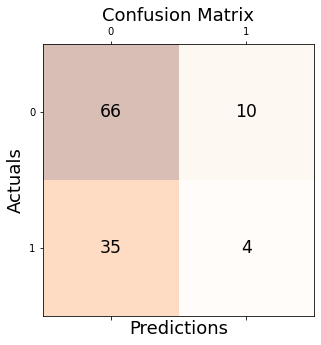

In [55]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [56]:
print('Precision Score: %.3f' % precision_score(y_test, y_pred))
print('Recall Score: %.3f' % recall_score(y_test, y_pred))
print('Accuracy Score: %.3f' % accuracy_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

Precision Score: 0.286
Recall Score: 0.103
Accuracy Score: 0.609
F1 Score: 0.151


Decision Tree

In [58]:
import pandas
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

In [60]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [61]:
y_pred = dtc.predict(x_test)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

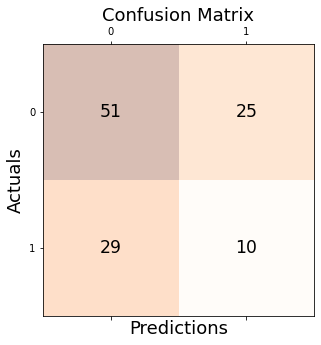

In [62]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [63]:
print('Precision Score: %.3f' % precision_score(y_test, y_pred))
print('Recall Score: %.3f' % recall_score(y_test, y_pred))
print('Accuracy Score: %.3f' % accuracy_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

Precision Score: 0.286
Recall Score: 0.256
Accuracy Score: 0.530
F1 Score: 0.270


Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
lrc= LogisticRegression()
lrc.fit(x_train, y_train)

LogisticRegression()

In [67]:
y_pred = lrc.predict(x_test)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

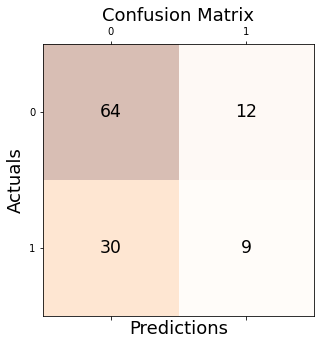

In [68]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [69]:
print('Precision Score: %.3f' % precision_score(y_test, y_pred))
print('Recall Score: %.3f' % recall_score(y_test, y_pred))
print('Accuracy Score: %.3f' % accuracy_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

Precision Score: 0.429
Recall Score: 0.231
Accuracy Score: 0.635
F1 Score: 0.300


Importance

In [71]:
Importance_list=['MarriedID_Not married',
'GenderID_M',
'RoleID_Back End Developer',
'RoleID_Business Analyst',
'RoleID_DevOps Engineer',
'RoleID_Digital Product Manager',
'RoleID_Front End Developer',
'RoleID_Mobile Developer Android',
'RoleID_Mobile Developer iOS',
'RoleID_Product Owner',
'RoleID_Scrum Master',
'RoleID_Software Architect',
'RoleID_System Documentation',
'RoleID_UI Designer',
'RoleID_UX Designer',
'RoleID_UX Researcher',
'RoleID_UX Writer',
'LevelID_Middle',
'LevelID_Senior',
'PerfScoreID_Exceed',
'PerfScoreID_Fully meets',
'PerfScoreID_Need improvement',
'PerfScoreID_Special treatment',
'RaceDesc_Cina',
'RaceDesc_Jawa',
'RaceDesc_Padang',
'RaceDesc_Sunda',
'RecruitmentSource_Diversity Job Fair',
'RecruitmentSource_Employee Referral',
'RecruitmentSource_Google Search',
'RecruitmentSource_Indeed',
'RecruitmentSource_LinkedIn',
'RecruitmentSource_On-line Web application', 
'RecruitmentSource_Other',
'RecruitmentSource_Website',
'EmpSatisfaction',
'SpecialProjectsCount',
'DaysLateLast30',
'Absences',
'EngagementSurvey']

In [73]:
print(lrc.coef_)

[[ 0.01292223  0.04503412  0.59993995 -0.39588671 -0.20426308  0.
   0.10610876 -0.09722775 -0.60658814  0.14106801  0.91611924 -0.18653662
  -0.30340737  1.03135233 -0.46822388 -0.18766046 -0.32409158 -0.11045108
  -0.12987117 -0.37680426 -0.27294236 -0.09716681  0.37274977  0.27365881
   0.21096544 -0.16928643 -0.24916721  0.72758925 -1.19748377  1.10489202
  -0.32192989 -0.68212254  0.34692358 -0.15388198 -1.12863077 -0.25594546
  -0.1276323   0.13709531  0.03661202 -0.05269435]]


In [78]:
log_odds = lrc.coef_[0]
feat_imp1=pd.DataFrame(abs(log_odds), 
             Importance_list, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)
feat_imp1.head(10)

,coef
RecruitmentSource_Employee Referral,1.197484
RecruitmentSource_Website,1.128631
RecruitmentSource_Google Search,1.104892
RoleID_UI Designer,1.031352
RoleID_Scrum Master,0.916119
RecruitmentSource_Diversity Job Fair,0.727589
RecruitmentSource_LinkedIn,0.682123
RoleID_Mobile Developer iOS,0.606588
RoleID_Back End Developer,0.599940
RoleID_UX Designer,0.468224
